## Exercise: Estimating  𝜋  via Monte Carlo 

Imagine you're throwing darts, and you're not very accurate. You are trying to hit a spot somewhere within a circular target, but you can't manage to do much better than throw it somewhere within the square that bounds the target, hitting any point within the square with equal probability. The red dots are those darts that manage to hit the circle, and the blue dots are those darts that don't.
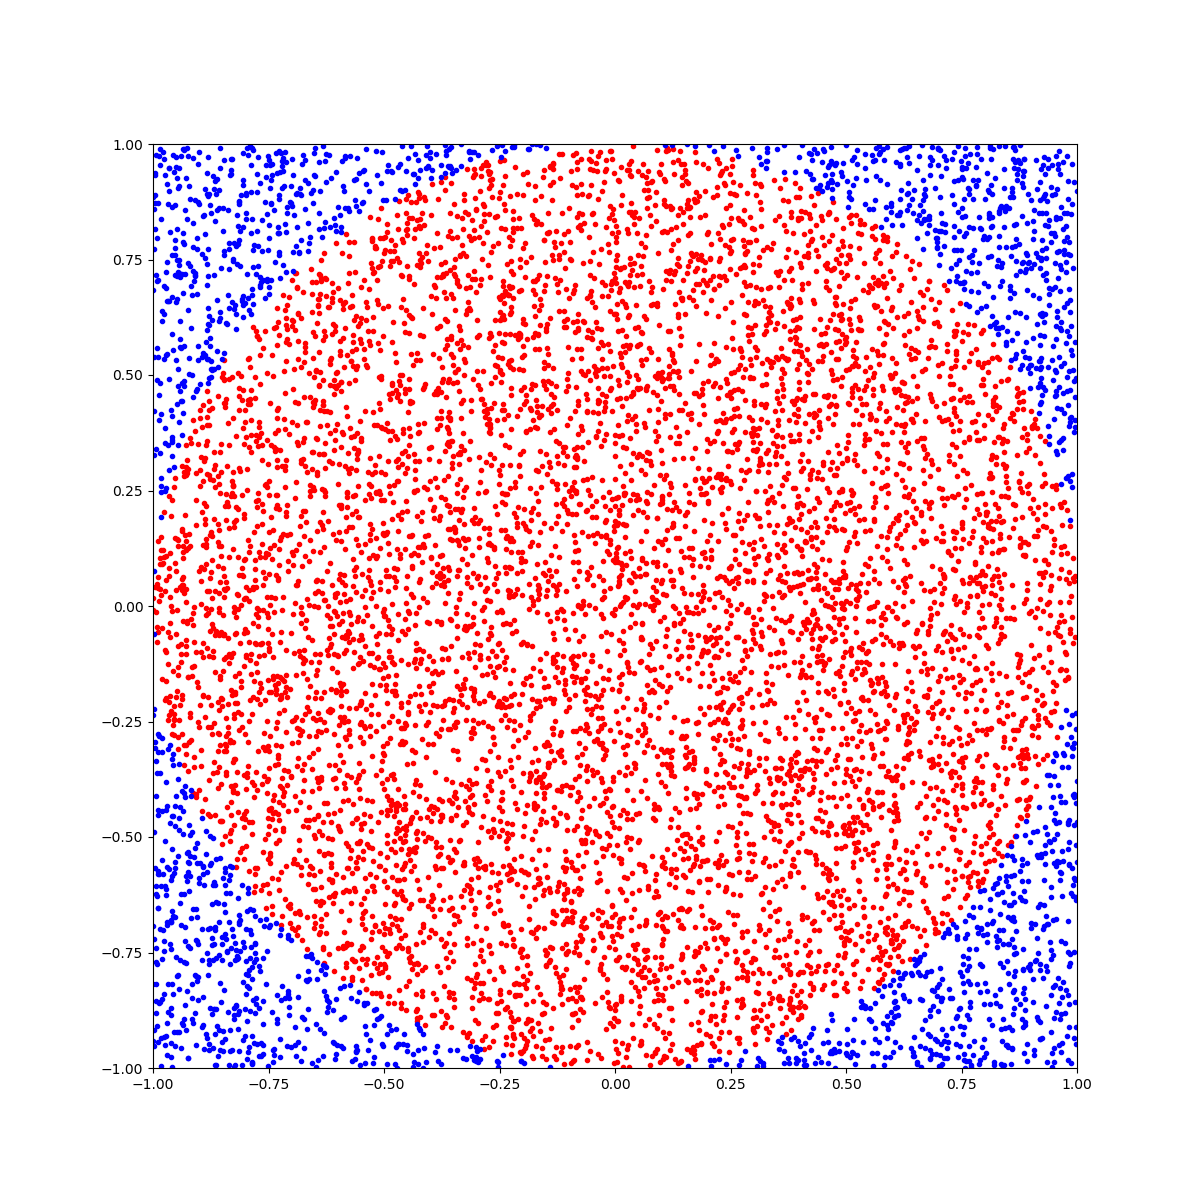
Fortunately, even though you are not a very good dart thrower, you are a good random number generator, and you can put those skills to work to estimate the numerical value of π — the ratio of the circumference of a circle to its diameter.
We can compute the value of π using a random number generator. We count the points falling inside the red circle M compared to the blue square N. Then π is approximated by the ratio 4*M/N.

### Serial version without using libraries

In [1]:
import random
import sys

def calc_pi(N):
    M = 0
    for i in range(N):
    # Simulate impact coordinates
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
    # True if impact happens inside the circle
        if x**2 + y**2 < 1.0:
            M += 1
    return 4 * M / N


#num_trials = 10**6
num_trials = int(sys.argv[1])

pi = calc_pi(num_trials)

print("\n \t Computing pi in serial: \n")
print("\t For %d trials, pi = %f\n" % (num_trials,pi))

%timeit -r3 calc_pi(num_trials)


 	 Computing pi in serial: 

	 For 1000000 trials, pi = 3.143048

471 ms ± 6.68 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


### Serial version with numpy w/o arrays

In [3]:
import numpy.random as rng

def calc_pi_numpy(N):
    Ncirc = 0
    for _ in range(num_trials):
        x = rng.random()
        y = rng.random()
        if ( x**2 + y**2 < 1.0 ):
            Ncirc +=1
    return 4 * Ncirc / N

#num_trials = 10**7

pi = calc_pi(num_trials)

print("\n \t Computing pi in serial with numpy w/o arrays: \n")
print("\t For %d trials, pi = %f\n" % (num_trials,pi))

%timeit -r3 calc_pi(num_trials)


 	 Computing pi in serial with numpy w/o arrays: 

	 For 1000000 trials, pi = 3.141328

466 ms ± 6.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Serial version with numpy w/ arrays

In [4]:
import numpy as np

def calc_pi_numpy(N):
# Simulate impact coordinates
    pts = np.random.uniform(-1, 1, (2, N))
# Count number of impacts inside the circle
    M = np.count_nonzero((pts**2).sum(axis=0) < 1)
    return 4 * M / N

#num_trials = 10**7

pi = calc_pi_numpy(num_trials)

print("\n \t Computing pi in serial with numpy w/ arrays: \n")
print("\t For %d trials, pi = %f\n" % (num_trials,pi))

%timeit -r3 calc_pi_numpy(num_trials)


 	 Computing pi in serial with numpy w/ arrays: 

	 For 1000000 trials, pi = 3.140612

15.2 ms ± 157 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


This is a *vectorized* version of the original algorithm. It nicely demonstrates *data parallelization*, where a *single operation* is replicated over collections of data. It contrasts to *task parallelization*, where different independent procedures are performed in parallel (think for example about cutting the vegetables while simmering the split peas).

If we compare with the ‘naive’ implementation above, we see that our new one is much faster.

### A version with numba

In [6]:
from numba import njit

@njit(fastmath=True, cache=True, nogil=True)
def calc_pi_numba(N):
    M = 0
    for i in range(N):
# Simulate impact coordinates
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
# True if impact happens inside the circle
        if x**2 + y**2 < 1.0:
            M += 1
    return 4 * M / N

#num_trials = 10**7

pi = calc_pi_numba(num_trials)

print("\n \t Computing pi with numba: \n")
print("\t For %d trials, pi = %f\n" % (num_trials,pi))

%timeit -r3 calc_pi_numba(num_trials)


 	 Computing pi with numba: 

	 For 1000000 trials, pi = 3.140356

7.41 ms ± 7.86 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Parallel version with numba

In [8]:
from numba import njit, prange

@njit(fastmath=True, cache=True, parallel=True)

def calc_pi_numba_par(N):
    M = 0
    for i in prange(N):
# Simulate impact coordinates
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
# True if impact happens inside the circle
        if x**2 + y**2 < 1.0:
            M += 1
    return M

#num_trials = 10**7

pi = calc_pi_numba_par(num_trials) * 4 / num_trials

print("\n \t Computing pi in parallel version with numba: \n")
print("\t For %d trials, pi = %f\n" % (num_trials,pi))

%timeit -r3 calc_pi_numba_par(num_trials)


 	 Computing pi in parallel version with numba: 

	 For 1000000 trials, pi = 3.140620

1.35 ms ± 38.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
